## Data loading and preprocessing

We are loading a dataset consisting of Amazon product reviews for products from the category "Electronics". We do not know what types of products are covered by these reviews and we want to uncover that by means of applying **topic modeling** (LDA) on this corpus of reviews 

In [56]:
import pandas as pd

articles = pd.read_csv('bio-cs-wiki-dataset.csv') # in our file, the values are actually TAB-separated
articles


url   
0               https://en.wikipedia.org/wiki/Geology  \
1      https://en.wikipedia.org/wiki/Family_(biology)   
2        https://en.wikipedia.org/wiki/Cell_(biology)   
3    https://en.wikipedia.org/wiki/Taxonomy_(biology)   
4     https://en.wikipedia.org/wiki/Molecular_biology   
..                                                ...   
91  https://en.wikipedia.org/wiki/Bachelor_of_Comp...   
92  https://en.wikipedia.org/wiki/Decomposition_(c...   
93  https://en.wikipedia.org/wiki/Kernel_(operatin...   
94  https://en.wikipedia.org/wiki/Statement_(compu...   
95  https://en.wikipedia.org/wiki/Default_(compute...   

                               title   
0                            Geology  \
1                   Family (biology)   
2                     Cell (biology)   
3                 Taxonomy (biology)   
4                  Molecular biology   
..                               ...   
91      Bachelor of Computer Science   
92  Decomposition (computer science)   
93         Kernel (operating system)   
94      Statement (computer science)   
95        Default (computer science)   

                                              summary   
0   Geology (from Ancient Greek  γῆ (gê) 'earth', ...  \
1   Family (Latin: familia, pl.: familiae) is one ...   
2   The cell is the basic structural and functiona...   
3   In biology, taxonomy (from Ancient Greek  τάξι...   
4   Molecular biology  is a branch of biology that...   
..                                                ...   
91  The Bachelor of Computer Science (abbreviated ...   
92  Decomposition in computer science, also known ...   
93  The kernel is a computer program at the core o...   
94  In computer programming, a statement is a synt...   
95  A default, in computer science, refers to the ...   

                                                 text  num_views  num_edits   
0   Geology (from Ancient Greek  γῆ (gê) 'earth', ...    4234884       3361  \
1   Family (Latin: familia, pl.: familiae) is one ...    2773053        957   
2   The cell is the basic structural and functiona...    9210652       4757   
3   In biology, taxonomy (from Ancient Greek  τάξι...    9881050       3913   
4   Molecular biology  is a branch of biology that...    2143110       1504   
..                                                ...        ...        ...   
91  The Bachelor of Computer Science (abbreviated ...    1154301        279   
92  Decomposition in computer science, also known ...     369735        106   
93  The kernel is a computer program at the core o...    4119334       2526   
94  In computer programming, a statement is a synt...     501374        334   
95  A default, in computer science, refers to the ...     275517        170   

                                           categories  revision_id    topic  
0   All articles needing additional references, Al...   1185274317  biology  
1   Articles containing French-language text, Arti...   1184573942  biology  
2   1665 in science, All articles with unsourced s...   1183123649  biology  
3   All articles containing potentially dated stat...   1184906981  biology  
4   All articles with unsourced statements, Applie...   1184889063  biology  
..                                                ...          ...      ...  
91  All articles needing additional references, Al...   1180543926       cs  
92  All articles needing additional references, Ar...   1186899342       cs  
93  All articles with unsourced statements, Articl...   1186513759       cs  
94  All articles with bare URLs for citations, Art...   1186809926       cs  
95  All articles needing additional references, Al...   1167452657       cs  

[96 rows x 9 columns]

### Preprocessing

We next want to preprocess our review texts to eliminate as much of the "noise" that could affect the topic modeling. We will apply common text preprocessing: 

- Tokenization: we split the texts into words/tokens
- Stopword and punctuation removal: we eliminate all tokens that are in the list of stopwords (and puncutation)
- Additionally, we remove all non-content words, i.e., all words with part-of-speech-tags that do not correspond to nouns, verbs, adjectives, ...

We will use SpaCy to perform tokenization and filtering. 
- To do that, one first needs to install spacy and download the corresponding model
- We will use the model "en_core_web_md" that contains tokenization, part-of-speech tagging and other models for English

To install spacy, run the following in command line: 
- *pip install spacy*

To download the model, run the following in command line: 
- *python -m spacy download en_core_web_md*


In [2]:
import spacy
import wordcloud
from wordcloud import STOPWORDS

# removing the repetitions if there are any, converting the list to set
stopwords = set(list(STOPWORDS) + ['.', "?", "!", ",", "(", ")", ":", ";", "\"", "'", "=", "-"])
stop_tags = ['PRON','CCONJ','PUNCT','PART','DET','SPACE', 'NUM', 'SYM']
print(stopwords)

nlp = spacy.load("en_core_web_md")

{'would', 'there', "what's", ')', 'before', 'for', 'does', 'had', 'such', "'", 'however', 'ever', "i'm", 'we', 'more', "we'd", 'are', "why's", "wasn't", 'so', "let's", 'cannot', "where's", "aren't", 'do', 'me', 'yours', 'most', '(', "shan't", 'our', 'hence', 'he', 'both', '"', 'a', 'otherwise', 'who', 'also', "it's", 'them', 'these', 'nor', 'and', 'where', 'they', 'when', "doesn't", 'no', 'own', 'all', 'or', 'under', "don't", 'i', 'did', 'as', 'against', 'has', "we've", 'having', 'each', 'am', 'was', "when's", 'any', "you'll", "we'll", 'very', "you'd", "he's", 'my', 'why', 'again', 'until', 'shall', 'you', 'hers', "he'd", 'during', 'herself', 'yourself', "he'll", 'myself', 'here', 'while', 'your', 'get', 'ourselves', "shouldn't", "she's", '!', 'into', 'between', 'be', "i'd", 'only', 'out', 'she', 'on', 'up', 'after', 'being', "she'd", 'with', 'just', 'through', 'about', 'itself', 'down', 'over', "how's", 'since', "there's", 'if', 'this', 'him', ':', 'is', "can't", 'by', "hadn't", "here

In [4]:
# we're tokenizing all reviews, and from each eliminating stopwords and words with non-content POS-tags
articles["tokens"] = articles.text.apply(lambda x: [t.lemma_.lower() for t in nlp(x, disable=["parser", "ner"]) if (t.text.strip() != "" and (t.text.lower() not in stopwords) and t.pos_ not in stop_tags)])

In [5]:
articles

url   
0               https://en.wikipedia.org/wiki/Geology  \
1      https://en.wikipedia.org/wiki/Family_(biology)   
2        https://en.wikipedia.org/wiki/Cell_(biology)   
3    https://en.wikipedia.org/wiki/Taxonomy_(biology)   
4     https://en.wikipedia.org/wiki/Molecular_biology   
..                                                ...   
91  https://en.wikipedia.org/wiki/Bachelor_of_Comp...   
92  https://en.wikipedia.org/wiki/Decomposition_(c...   
93  https://en.wikipedia.org/wiki/Kernel_(operatin...   
94  https://en.wikipedia.org/wiki/Statement_(compu...   
95  https://en.wikipedia.org/wiki/Default_(compute...   

                               title   
0                            Geology  \
1                   Family (biology)   
2                     Cell (biology)   
3                 Taxonomy (biology)   
4                  Molecular biology   
..                               ...   
91      Bachelor of Computer Science   
92  Decomposition (computer science)   
93         Kernel (operating system)   
94      Statement (computer science)   
95        Default (computer science)   

                                              summary   
0   Geology (from Ancient Greek  γῆ (gê) 'earth', ...  \
1   Family (Latin: familia, pl.: familiae) is one ...   
2   The cell is the basic structural and functiona...   
3   In biology, taxonomy (from Ancient Greek  τάξι...   
4   Molecular biology  is a branch of biology that...   
..                                                ...   
91  The Bachelor of Computer Science (abbreviated ...   
92  Decomposition in computer science, also known ...   
93  The kernel is a computer program at the core o...   
94  In computer programming, a statement is a synt...   
95  A default, in computer science, refers to the ...   

                                                 text  num_views  num_edits   
0   Geology (from Ancient Greek  γῆ (gê) 'earth', ...    4234884       3361  \
1   Family (Latin: familia, pl.: familiae) is one ...    2773053        957   
2   The cell is the basic structural and functiona...    9210652       4757   
3   In biology, taxonomy (from Ancient Greek  τάξι...    9881050       3913   
4   Molecular biology  is a branch of biology that...    2143110       1504   
..                                                ...        ...        ...   
91  The Bachelor of Computer Science (abbreviated ...    1154301        279   
92  Decomposition in computer science, also known ...     369735        106   
93  The kernel is a computer program at the core o...    4119334       2526   
94  In computer programming, a statement is a synt...     501374        334   
95  A default, in computer science, refers to the ...     275517        170   

                                           categories  revision_id    topic   
0   All articles needing additional references, Al...   1185274317  biology  \
1   Articles containing French-language text, Arti...   1184573942  biology   
2   1665 in science, All articles with unsourced s...   1183123649  biology   
3   All articles containing potentially dated stat...   1184906981  biology   
4   All articles with unsourced statements, Applie...   1184889063  biology   
..                                                ...          ...      ...   
91  All articles needing additional references, Al...   1180543926       cs   
92  All articles needing additional references, Ar...   1186899342       cs   
93  All articles with unsourced statements, Articl...   1186513759       cs   
94  All articles with bare URLs for citations, Art...   1186809926       cs   
95  All articles needing additional references, Al...   1167452657       cs   

                                               tokens  
0   [geology, ancient, greek, γῆ, gê, earth, λoγία...  
1   [family, latin, familia, pl, familiae, major, ...  
2   [cell, basic, structural, functional, unit, fo...  
3   [biology, taxonomy, ancient, greek, τάξις, tax...  
4   [molecular, biolo

In [6]:
ind = 24
print(articles.iloc[ind].text)
articles.iloc[ind].tokens

In biology, polymorphism is the occurrence of two or more clearly different morphs or forms, also referred to as alternative phenotypes, in the population of a species. To be classified as such, morphs must occupy the same habitat at the same time and belong to a panmictic population (one with random mating).Put simply, polymorphism is when there are two or more possibilities of a trait on a gene. For example, there is more than one possible trait in terms of a jaguar's skin colouring; they can be light morph or dark morph. Due to having more than one possible variation for this gene, it is termed 'polymorphism'. However, if the jaguar has only one possible trait for that gene, it would be termed "monomorphic". For example, if there was only one possible skin colour that a jaguar could have, it would be termed monomorphic.
The term polyphenism can be used to clarify that the different forms arise from the same genotype. Genetic polymorphism is a term used somewhat differently by geneti

['biology',
 'polymorphism',
 'occurrence',
 'clearly',
 'different',
 'morph',
 'form',
 'refer',
 'alternative',
 'phenotype',
 'population',
 'specie',
 'classify',
 'morph',
 'must',
 'occupy',
 'habitat',
 'time',
 'belong',
 'panmictic',
 'population',
 'random',
 'mating).put',
 'simply',
 'polymorphism',
 'possibility',
 'trait',
 'gene',
 'example',
 'possible',
 'trait',
 'term',
 'jaguar',
 'skin',
 'colouring',
 'light',
 'morph',
 'dark',
 'morph',
 'due',
 'possible',
 'variation',
 'gene',
 'term',
 'polymorphism',
 'jaguar',
 'possible',
 'trait',
 'gene',
 'term',
 'monomorphic',
 'example',
 'possible',
 'skin',
 'colour',
 'jaguar',
 'term',
 'monomorphic',
 'term',
 'polyphenism',
 'use',
 'clarify',
 'different',
 'form',
 'arise',
 'genotype',
 'genetic',
 'polymorphism',
 'term',
 'use',
 'somewhat',
 'differently',
 'geneticist',
 'molecular',
 'biologist',
 'describe',
 'certain',
 'mutation',
 'genotype',
 'single',
 'nucleotide',
 'polymorphism',
 'may',
 'al

## Peparation for topic modeling with LDA

We will carry out topic modeling with the implementation of LDA from the popular library *gensim*. To be able to apply LDA from gensim, we first need to prepare some data structures, namely: the *dictionary* of words we will use as the vocabulary over which to carry out topic models. 

We can influence on how big the dictionary will be, via the parameters of the *filter_extremes* method:  

- by setting the minimal number of documents (reviews) in which the token has to appear to be included in the dictionary (this eliminates the most infrequent terms, unlikely to be relevant for any topic)

- by setting the maximal percentage of documents in which the token is allowed to appear (this eliminates the most frequent terms, likely to be "part of" every topic) 

In [7]:
from gensim.corpora.dictionary import Dictionary
dictionary = Dictionary(articles['tokens'])

dictionary.filter_extremes(no_below=5, no_above=0.1)

l = list(dictionary.items())
print(l)
print(len(l))


[(0, '18th'), (1, 'absolute'), (2, 'accomplish'), (3, 'accordingly'), (4, 'actively'), (5, 'advancement'), (6, 'aggregate'), (7, 'ago'), (8, 'alfred'), (9, 'alongside'), (10, 'america'), (11, 'ancillary'), (12, 'angle'), (13, 'artifact'), (14, 'atmosphere'), (15, 'axis'), (16, 'beneath'), (17, 'bodied'), (18, 'bottom'), (19, 'bracket'), (20, 'bridge'), (21, 'canada'), (22, 'canadian'), (23, 'carbon'), (24, 'chamber'), (25, 'civil'), (26, 'cleavage'), (27, 'climate'), (28, 'collapse'), (29, 'color'), (30, 'compilation'), (31, 'compression'), (32, 'conjunction'), (33, 'constituent'), (34, 'continental'), (35, 'continual'), (36, 'convergent'), (37, 'coupling'), (38, 'credit'), (39, 'crystallize'), (40, 'cut'), (41, 'dataset'), (42, 'decipher'), (43, 'definite'), (44, 'dense'), (45, 'deposit'), (46, 'destroy'), (47, 'diagnostic'), (48, 'diffuse'), (49, 'dinosaur'), (50, 'distinctive'), (51, 'divergent'), (52, 'drift'), (53, 'drop'), (54, 'dry'), (55, 'endogenous'), (56, 'england'), (57, 'e

We're next creating the corpus as a set of sparse document vectors: for this we're using the *doc2bow* function of the gensim Dictionary object: 

In [8]:
corpus = [dictionary.doc2bow(a) for a in articles['tokens']]
corpus


[[(0, 1),
  (1, 9),
  (2, 3),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 4),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 4),
  (28, 1),
  (29, 4),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 3),
  (35, 1),
  (36, 3),
  (37, 2),
  (38, 1),
  (39, 2),
  (40, 5),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 8),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 2),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 5),
  (59, 1),
  (60, 3),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 11),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 3),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 6),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 3),
  (91, 1

## Running topic modeling (LDA)

Having prepared (1) dictionary (i.e., vocabulary) and (2) corpus (i.e., sparse document vectors over the terms of the vocabulary), we are now ready to execute/run topic modeling. 

- *gensim* contains several classes for this. The standard one is *gensim.models.ldamodel.LdaModel*. We will, however, resort to *gensim.models.LdaMulticore*, which allows a faster, multi-core training of the LDA model. Multicore means that multiple processor units (CPUs) will be used, if available, to parallelize the computation. 

*gensim.models.LdaMulticore* takes, among others, the following parameters: 
- *corpus*: the list of sparse document bag-of-word vectors (which we've built already)
- *id2word*: the mapping from vocabulary IDs to actual tokens, which is exactly what our "dictionary" contains
- *num_topics*: number of topics we would like to induce
- *iterations*: max. number of iterations through the corpus when inferring the topic distribution of a corpus
- *workers*: how many parallel threads (i.e., CPUs) to use for training the topic model  



In [9]:
from gensim.models import LdaMulticore
# alternative: gensim.models.ldamodel.LdaModel

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=200, workers = 4)

In [34]:
lda_model.show_topic(110)
#.print_topics(num_words=20)


[('botany', 0.029697776),
 ('chloroplast', 0.023272755),
 ('botanical', 0.022039345),
 ('vascular', 0.015752912),
 ('photosynthetic', 0.013687675),
 ('soil', 0.013324221),
 ('shoot', 0.01264978),
 ('carbon', 0.012207368),
 ('botanist', 0.012067503),
 ('phylogeny', 0.0119802775)]

How are topics represented in documents? Or, put differently, which documents belong to which topics?
- This information is stored in our *lda_model* object after training
- We can access the corpus with lda_model[corpus] and then index that list for the document we're interested in

In [31]:
ind = 18
print(lda_model[corpus][ind])

articles["text"][ind]

[(4, 0.07039791), (19, 0.015721757), (54, 0.24666531), (82, 0.021369388), (90, 0.011200694), (156, 0.017568046), (162, 0.068757646), (168, 0.522646)]


'Transcription is the process of copying a segment of DNA into RNA.  The segments of DNA transcribed into RNA molecules that can encode proteins are said to produce messenger RNA (mRNA).  Other segments of DNA are copied into RNA molecules called non-coding RNAs (ncRNAs).  mRNA comprises only 1–3% of total RNA samples. Less than 2% of the human genome can be transcribed into mRNA (Human genome#Coding vs. noncoding DNA), while at least 80% of mammalian genomic DNA can be actively transcribed (in one or more types of cells), with the majority of this 80% considered to be ncRNA.Both DNA and RNA are nucleic acids, which use base pairs of nucleotides as a complementary language.  During transcription, a DNA sequence is read by an RNA polymerase, which produces a complementary, antiparallel RNA strand called a primary transcript.\nTranscription proceeds in the following general steps:\n\nRNA polymerase, together with one or more general transcription factors, binds to promoter DNA.\nRNA poly

## Evaluating topics

- Question #1: How good are the topics we induced? 
- Question #2: We define the number of topics in advance. What is the optimal number of topics? Optimal w.r.t. what criteria?

One widely adopted way to evaluate topic models is with various coherence measures: these quantify (in various ways) the semantic similarity / lexical association between the most prominent words of each topic. If the words that have the highest weight in each topic are not semantically similar/associated, then the topic is not coherent. 

There is a number of coherence measures already implemented in *gensim* in the class *gensim.modelsCoherenceModel*. We will use some of those to quantify the coherence of the topics we induced. 
 

In [35]:
# We will execute topic modeling 20 times, each time with the different number of topics
max_topics = 201 
models = []

for i in range(10, max_topics, 10):
    print("Training LDA with " + str(i) + " topics.")
    
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=i, workers = 4)
    models.append(lda_model)
          
    print("Done.")    

Training LDA with 10 topics.
Done.
Training LDA with 20 topics.
Done.
Training LDA with 30 topics.
Done.
Training LDA with 40 topics.
Done.
Training LDA with 50 topics.
Done.
Training LDA with 60 topics.
Done.
Training LDA with 70 topics.
Done.
Training LDA with 80 topics.
Done.
Training LDA with 90 topics.
Done.
Training LDA with 100 topics.
Done.
Training LDA with 110 topics.
Done.
Training LDA with 120 topics.
Done.
Training LDA with 130 topics.
Done.
Training LDA with 140 topics.
Done.
Training LDA with 150 topics.
Done.
Training LDA with 160 topics.
Done.
Training LDA with 170 topics.
Done.
Training LDA with 180 topics.
Done.
Training LDA with 190 topics.
Done.
Training LDA with 200 topics.
Done.


In [40]:
from gensim.models import CoherenceModel

coherence_measure = 'u_mass' # u_mass, 'c_v', 'c_uci', 'c_npmi'
scores = []

for i in range(len(models)):
    print("Computing coherence for the LDA model with " + str((i+1)*10) + " topics.")
    cm = CoherenceModel(model=models[i], corpus=corpus, texts = articles["tokens"], dictionary=dictionary, coherence=coherence_measure)
    score = cm.get_coherence()
    print(score)
    scores.append(score)
    print("Done.")
    

Computing coherence for the LDA model with 10 topics.
-10.584740612972105
Done.
Computing coherence for the LDA model with 20 topics.
-9.758184061849912
Done.
Computing coherence for the LDA model with 30 topics.
-9.715814448648919
Done.
Computing coherence for the LDA model with 40 topics.
-9.426348141776346
Done.
Computing coherence for the LDA model with 50 topics.
-8.336601418901315
Done.
Computing coherence for the LDA model with 60 topics.
-8.211428253882833
Done.
Computing coherence for the LDA model with 70 topics.
-7.371065154183798
Done.
Computing coherence for the LDA model with 80 topics.
-7.219813231810164
Done.
Computing coherence for the LDA model with 90 topics.
-6.72107511171068
Done.
Computing coherence for the LDA model with 100 topics.
-6.898365014368023
Done.
Computing coherence for the LDA model with 110 topics.
-6.710421023158004
Done.
Computing coherence for the LDA model with 120 topics.
-5.3628419460992935
Done.
Computing coherence for the LDA model with 130 t

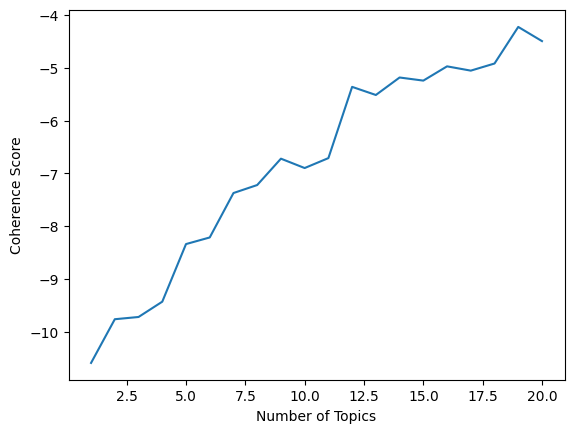

In [41]:
import matplotlib.pyplot as plt

num_topics = [i+1 for i in range(len(scores))]
                                
_=plt.plot(num_topics, scores)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [54]:
# according to the u_mass measure, model with 190 topics looks like a good choice
# let's see what those topics look like

num_tops = 50
models[num_tops//10 - 1].print_topics(num_words = 7)

[(5,
  '0.080*"hybrid" + 0.023*"polymorphism" + 0.010*"lexical" + 0.010*"phenotype" + 0.009*"offspring" + 0.009*"ant" + 0.009*"speciation"'),
 (16,
  '0.021*"xml" + 0.017*"ribosome" + 0.016*"codon" + 0.015*"consensus" + 0.015*"round" + 0.014*"mrna" + 0.014*"v"'),
 (18,
  '0.039*"ocean" + 0.016*"ecosystem" + 0.015*"biodiversity" + 0.014*"taxon" + 0.013*"zone" + 0.012*"botany" + 0.012*"coral"'),
 (32,
  '0.044*"polymerase" + 0.042*"promoter" + 0.026*"strand" + 0.014*"sequencing" + 0.013*"mrna" + 0.012*"island" + 0.012*"subunit"'),
 (38,
  '0.036*"default" + 0.022*"biodiversity" + 0.020*"cache" + 0.015*"consensus" + 0.014*"swap" + 0.014*"ecosystem" + 0.014*"equation"'),
 (30,
  '0.022*"parasite" + 0.020*"lexical" + 0.009*"rock" + 0.009*"resolution" + 0.009*"music" + 0.008*"lisp" + 0.008*"parasitic"'),
 (41,
  '0.040*"rock" + 0.036*"music" + 0.029*"v" + 0.026*"pop" + 0.018*"\\displaystyle" + 0.014*"uk" + 0.010*"scene"'),
 (42,
  '0.081*"concurrency" + 0.036*"kernel" + 0.027*"consensus" + 0

## Topic Visualization

There is a special library, *pyLDAvis*, that we can use to visualize topic models induced with *gensim* (among other). All you need to do is: 

- import the pyLDAvis package
- allow it to run inside the Jupyter notebook
- instantiate/prepare the display object, feeding the LDA model as an argument
- call the display function

In [52]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [55]:
lda_display = pyLDAvis.gensim_models.prepare(models[num_tops//10 - 1], corpus, dictionary)
pyLDAvis.display(lda_display)